# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


### Check the head of df

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### What are the top 5 zipcodes for 911 calls?

In [15]:
df['zip'].value_counts().head()


19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

### What are the top 5 townships (twp) for 911 calls?

In [16]:
df['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

### how many unique title codes are there?

In [17]:
df['title'].nunique()

141

## Creating new features

### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
### For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [18]:
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1,Traffic
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1,Traffic


### What is the most common Reason for a 911 call based off of this new column? 

In [19]:
df['reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason, dtype: int64

### Using seaborn to create a countplot of 911 calls by Reason. 

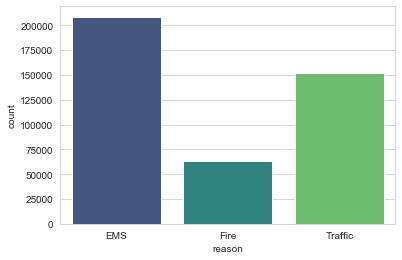

In [20]:
sns.countplot(x = 'reason',data = df, palette = 'viridis')

### What is the data type of the objects in the timeStamp column? 

In [21]:
type(df['timeStamp'].iloc[0])

str

### convert the column from strings to DateTime objects. 

In [22]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]
time.hour


17

In [23]:
t = df['timeStamp']
df['hour'] = df['timeStamp'].apply(lambda t : t.hour)
df['month'] = df['timeStamp'].apply(lambda t : t.month)
df['day of the week'] = df['timeStamp'].apply(lambda t : t.dayofweek )
df


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of the week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1,Traffic,8,11,4
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,4
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,4
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1,Traffic,8,11,4


In [24]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [25]:
df['day of the week'] = df['day of the week'].map(dmap)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of the week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1,Traffic,8,11,Fri
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,Fri
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,Fri
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1,Traffic,8,11,Fri


### Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

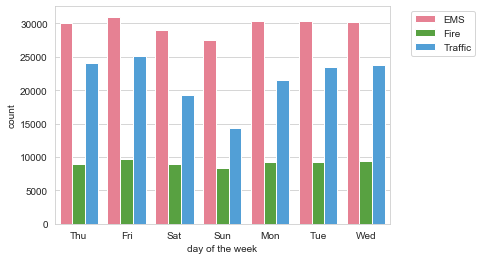

In [26]:
sns.countplot(x= 'day of the week',data = df,hue= 'reason', palette= 'husl' )
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.5)

**Now doing same for Month:**

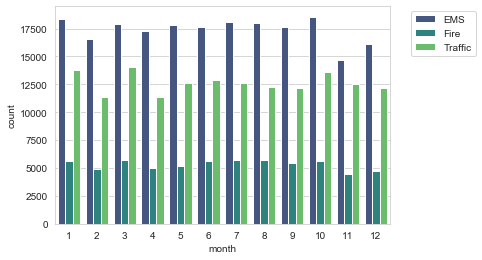

In [27]:
sns.countplot(x= 'month',data = df,hue= 'reason', palette= 'viridis' )
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.5)

### creating a gropuby object called byMonth, grouping the DataFrame by the month column and using the count() method for aggregation. 

In [28]:
bymonth = df.groupby('month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of the week
month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339


### creating a simple plot off of the dataframe indicating the count of calls per month. 

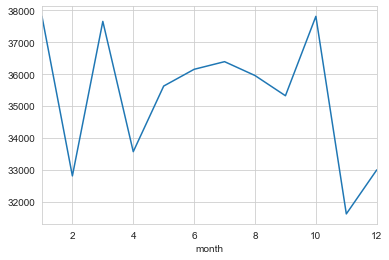

In [29]:
bymonth['twp'].plot()

### Using seaborn's lmplot() to create a linear fit on the number of calls per month.

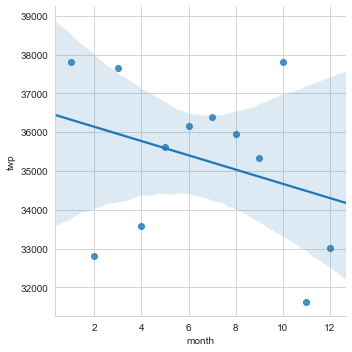

In [30]:
sns.lmplot(x='month',y='twp', data = bymonth.reset_index())

### Creating a new column called 'Date' that contains the date from the timeStamp column. 

In [31]:
df['date'] = df['timeStamp'].apply(lambda t : t.date())
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of the week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1,Traffic,8,11,Fri,2018-11-16
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,Fri,2018-11-16
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1,Traffic,8,11,Fri,2018-11-16
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1,Traffic,8,11,Fri,2018-11-16


### Grouping this Date column with the count() aggregate and creating a plot of counts of 911 calls

In [32]:
df.groupby('date').count()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of the week
date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-12,438,438,438,389,438,438,438,438,438,438,438,438,438
2018-11-13,437,437,437,371,437,437,436,437,437,437,437,437,437
2018-11-14,401,401,401,350,401,401,400,401,401,401,401,401,401


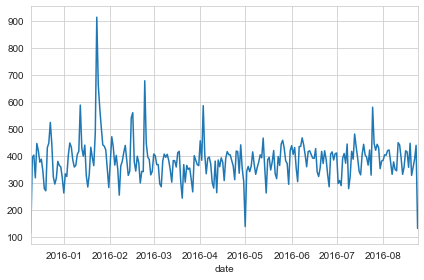

In [185]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

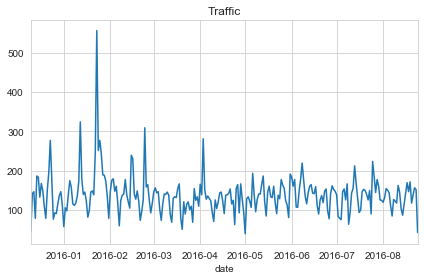

In [191]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

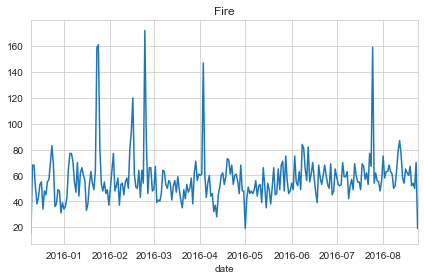

In [188]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

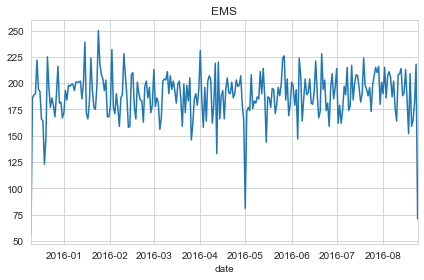

In [189]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [211]:
dayHour = df.groupby(by=['day of the week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of the week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


### Creating a HeatMap using this new DataFrame.

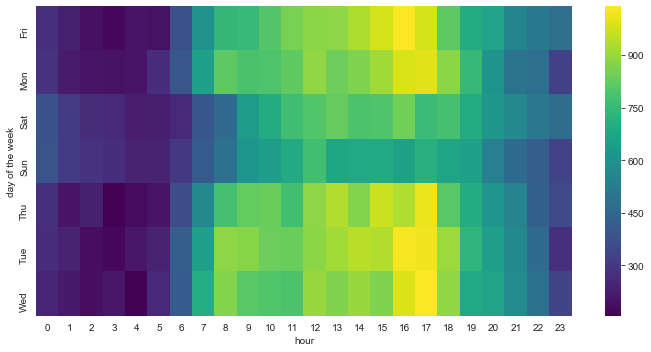

In [212]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour,cmap='viridis')
plt.tight_layout()

### creating a clustermap using this DataFrame. 

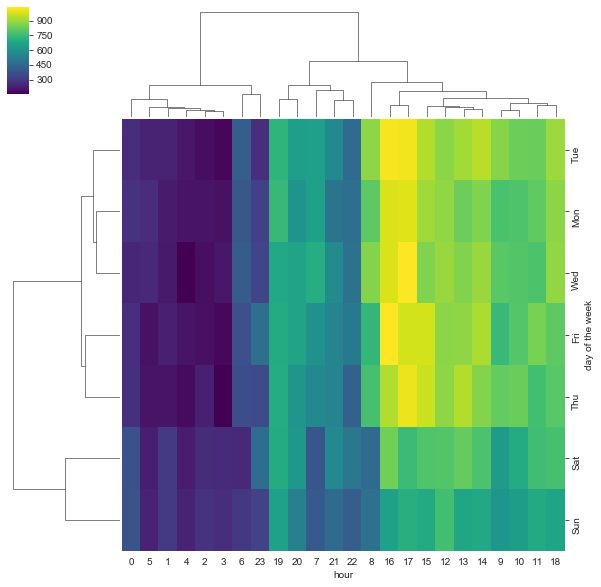

In [197]:
sns.clustermap(dayHour,cmap='viridis')


In [213]:
dayMonth = df.groupby(by=['day of the week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day of the week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


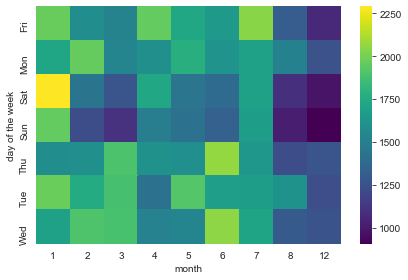

In [214]:
sns.heatmap(dayMonth,cmap='viridis')
plt.tight_layout()

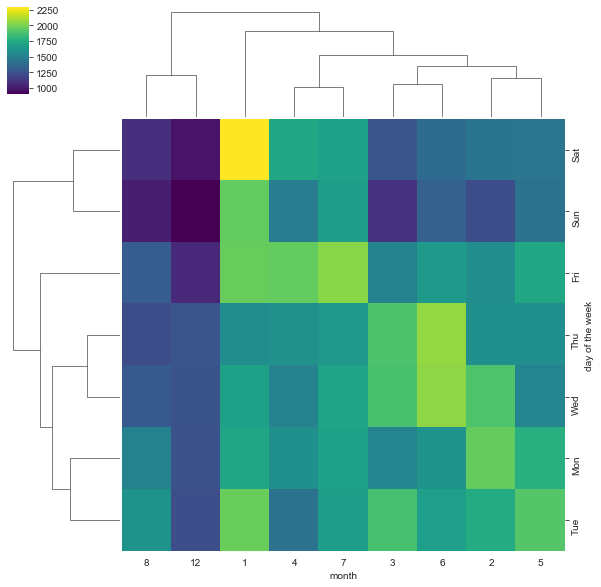

In [215]:
sns.clustermap(dayMonth,cmap='viridis')
